# EDA of enclosed datasets


## Yash Trivedi
## 2019B4AA0834G

###Loading data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive'
%pwd

/content/drive/MyDrive


'/content/drive/MyDrive'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
tourist = pd.read_csv("/content/drive/MyDrive/task3/enriched_tourist_trajectory.csv")

In [5]:
print(tourist.shape)

(33029, 16)


In [6]:
taxi = pd.read_csv("/content/drive/MyDrive/task3/segmented_taxi_trajectory_1117.csv")

In [7]:
print(taxi.shape)

(239762, 23)


### Tourist Data Pre-Processing and cleaning

In [8]:
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip


Checking for null values

In [9]:
print(pd.isnull(tourist).sum())

VehicleID          0
trajectory_id      0
date_time_o        0
date_time_d        0
category_o         0
subcategory_o      0
category_d         0
subcategory_d      0
lat_o              0
lon_o              0
lat_d              0
lon_d              0
distance           0
time_used          0
tourist_type       0
trajectory_type    0
dtype: int64


In [10]:
tourist.dtypes

VehicleID           object
trajectory_id       object
date_time_o         object
date_time_d         object
category_o          object
subcategory_o       object
category_d          object
subcategory_d       object
lat_o              float64
lon_o              float64
lat_d              float64
lon_d              float64
distance             int64
time_used          float64
tourist_type        object
trajectory_type     object
dtype: object

In [11]:
print(len(pd.unique(tourist['VehicleID'])))

3273


###Ranking VehicleID for easier handling

In [12]:
vehicleid = tourist[["VehicleID"]]
vehicleid.reset_index(drop = True).head()

,VehicleID
0,6LurW0yL8xDb6eslP9L3U/VH62U
1,OU+NtvniamKjJS7GdVebDYzVDqc
2,XCBitNTVEv/xoXEjSQJ6utsCtr4
3,pFPFjKr/IEz8P4UqUooLCaaxDRM
4,u2kp5kkoicvAyX1FC5S+L/+0/dY


In [13]:
ranked = pd.Categorical(vehicleid.stack()).codes.reshape(vehicleid.shape)

In [14]:
vehicleid = vehicleid.join(pd.DataFrame(ranked, columns=["masked_vehicle"]))

In [15]:
vehicleid.dtypes

VehicleID         object
masked_vehicle     int16
dtype: object

In [16]:
vehicleid.head()

,VehicleID,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,2972


In [17]:
print(len(pd.unique(vehicleid["masked_vehicle"])))

3273


3273 unique vehicles (taxis)

In [18]:
vehicleid.rename(columns = {'VehicleID':'dummy_name'}, inplace = True)
vehicleid = pd.DataFrame(vehicleid)
vehicleid

,dummy_name,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,2972
...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,1285


In [19]:
print(len(pd.unique(vehicleid["masked_vehicle"])))

3273


In [20]:
tourist = pd.concat([tourist, vehicleid], axis = 1)


In [21]:
tourist

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type,dummy_name,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip,6LurW0yL8xDb6eslP9L3U/VH62U,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip,OU+NtvniamKjJS7GdVebDYzVDqc,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip,XCBitNTVEv/xoXEjSQJ6utsCtr4,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip,pFPFjKr/IEz8P4UqUooLCaaxDRM,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip,u2kp5kkoicvAyX1FC5S+L/+0/dY,2972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,pIK42Fr5jzBmFyjny+Qp5M0amaQ_trip_20190417174454,2019-04-17 17:44:54,2019-04-17 17:56:55,Accommodation,Residential Building (Apartment / Condo),Spa,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,High spending tourist,SpaTrip,pIK42Fr5jzBmFyjny+Qp5M0amaQ,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,UL3za2TYuY4nfS/gRX8sSbhw/Xs_trip_20190417185526,2019-04-17 18:55:26,2019-04-17 19:07:02,Accommodation,Residential Building (Apartment / Condo),Restaurant,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,High spending tourist,FoodAndDrinkTrip,UL3za2TYuY4nfS/gRX8sSbhw/Xs,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,/uLPd/8sedu4wRkR7+MdKxMcME4_trip_20190417163626,2019-04-17 16:36:26,2019-04-17 16:55:10,Accommodation,Hotel,Spa,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,High spending tourist,SpaTrip,/uLPd/8sedu4wRkR7+MdKxMcME4,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ_trip_20190417181215,2019-04-17 18:12:15,2019-04-17 19:06:16,Accommodation,Hotel,Restaurant,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,High spending tourist,FoodAndDrinkTrip,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,1285


In [22]:
tourist = tourist.drop(["dummy_name"],axis=1)
tourist

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip,2972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,pIK42Fr5jzBmFyjny+Qp5M0amaQ,pIK42Fr5jzBmFyjny+Qp5M0amaQ_trip_20190417174454,2019-04-17 17:44:54,2019-04-17 17:56:55,Accommodation,Residential Building (Apartment / Condo),Spa,Spa,13.72068,100.75131,13.72225,100.72910,3070,12.02,High spending tourist,SpaTrip,2714
33025,UL3za2TYuY4nfS/gRX8sSbhw/Xs,UL3za2TYuY4nfS/gRX8sSbhw/Xs_trip_20190417185526,2019-04-17 18:55:26,2019-04-17 19:07:02,Accommodation,Residential Building (Apartment / Condo),Restaurant,Korean Restaurant,13.84509,100.58338,13.83998,100.57480,1542,11.60,High spending tourist,FoodAndDrinkTrip,1640
33026,/uLPd/8sedu4wRkR7+MdKxMcME4,/uLPd/8sedu4wRkR7+MdKxMcME4_trip_20190417163626,2019-04-17 16:36:26,2019-04-17 16:55:10,Accommodation,Hotel,Spa,Spa,13.52704,100.42049,13.64756,100.43121,13879,18.73,High spending tourist,SpaTrip,105
33027,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ,O4oHnNQ7k0FKEGWjqCDpVkfbAZQ_trip_20190417181215,2019-04-17 18:12:15,2019-04-17 19:06:16,Accommodation,Hotel,Restaurant,Restaurant,13.77877,100.81404,13.85921,100.81598,24127,54.02,High spending tourist,FoodAndDrinkTrip,1285


In [23]:
print(len(pd.unique(tourist["masked_vehicle"])))

3273


In [24]:
print(len(pd.unique(tourist["trajectory_id"])))

32580


###Categorical analysis of tourist data

In [25]:
cat_o = tourist["category_o"].value_counts()
cat_o

Accommodation    33029
Name: category_o, dtype: int64

**100% of trajectories are on boarded from accomodation**

In [26]:
print(len(pd.unique(tourist["subcategory_o"])))

12


In [27]:
tourist = tourist.replace(["inn"],"Inn")

In [28]:
tourist = tourist.replace(["Residential Building (Apartment / Condo)"],"Residential Building")

In [29]:
subcat_o = tourist["subcategory_o"].value_counts()
subcat_o

Hotel                   24668
Hostel                   2841
Residential Building     2763
Resort                    880
Bed & Breakfast           734
Inn                       601
Apartment                 484
Homestay                   20
Condo                      20
Hotel Pool                 14
Mansion                     4
Name: subcategory_o, dtype: int64

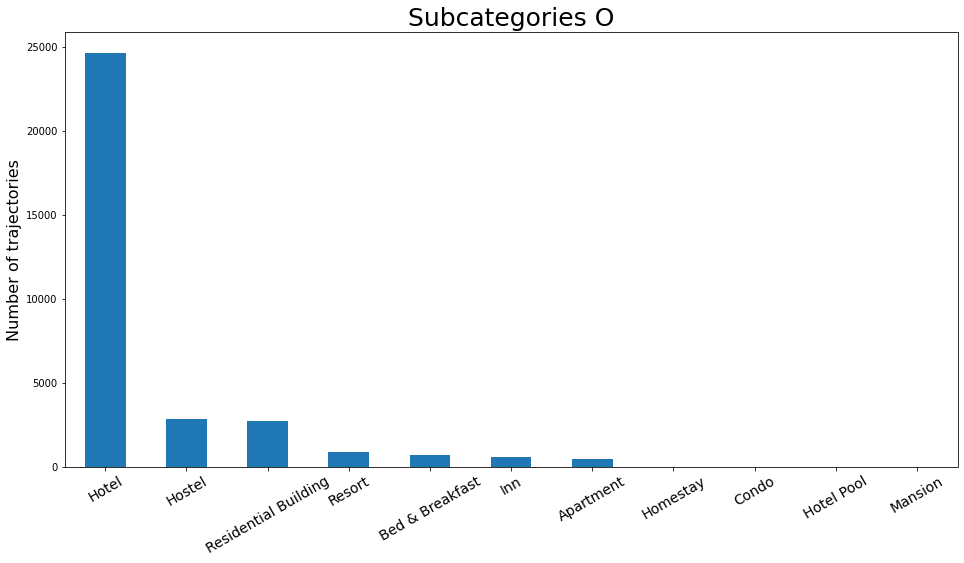

In [30]:
plt.figure(figsize = (16,8))
subcat_o.plot.bar()
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Subcategories O", fontsize = 25)
plt.xticks(rotation = 30, fontsize = 14)
plt.show()

In [31]:
24668/33029

0.7468588210360593

**74.69% trajectories are on boarded from Hotel**

In [32]:
cat_d = tourist["category_d"].value_counts()
cat_d

Restaurant       9982
NightClub/Bar    9808
Spa              9432
Shopping Mall    2740
Religious         852
Leisure           215
Name: category_d, dtype: int64

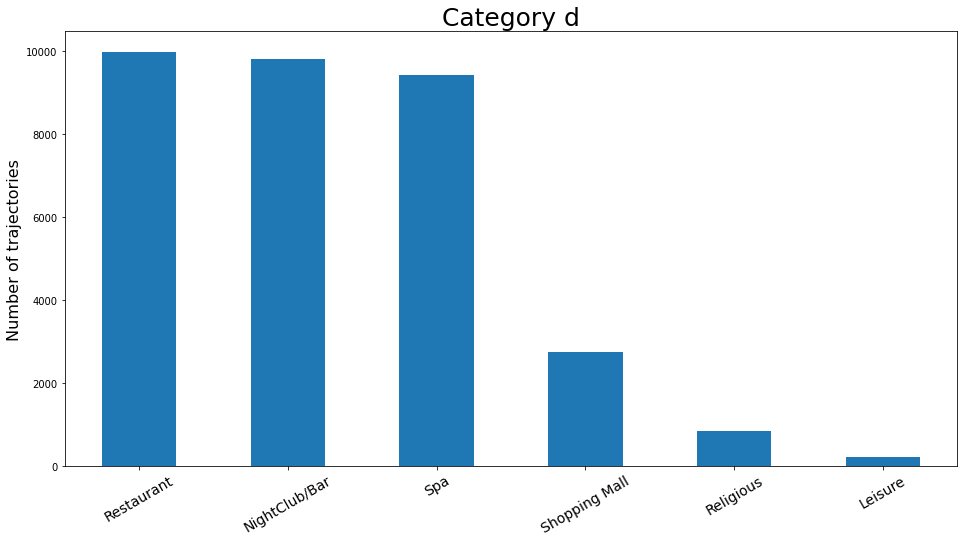

In [33]:
plt.figure(figsize = (16,8))
cat_d.plot.bar()
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Category d", fontsize = 25)
plt.xticks(rotation = 30, fontsize = 14)
plt.show()

**Most trajectories destination is Restaurant or Nightclub/Ba or Spa**

In [34]:
subcat_d = tourist["subcategory_d"].value_counts()
subcat_d

Spa                        9432
Karaoke Bar                2929
Bar                        2052
Thai Restaurant            1937
Shopping Mall              1913
                           ... 
General Entertainment         1
North Indian Restaurant       1
Portuguese Restaurant         1
Bike Shop                     1
Farmers Market                1
Name: subcategory_d, Length: 146, dtype: int64

###Top 10 destination restaurants

In [35]:
restaurant = tourist["subcategory_d"].loc[tourist["category_d"] == "Restaurant"]
res_val = restaurant.value_counts()
res_val

Thai Restaurant            1924
Restaurant                 1826
Japanese Restaurant         664
Sukiyaki Restaurant         507
Chinese Restaurant          435
                           ... 
Health & Beauty Service       1
North Indian Restaurant       1
Portuguese Restaurant         1
Karaoke Bar                   1
Farmers Market                1
Name: subcategory_d, Length: 91, dtype: int64

In [36]:
top_restaurant = res_val[:10]
top_restaurant

Thai Restaurant         1924
Restaurant              1826
Japanese Restaurant      664
Sukiyaki Restaurant      507
Chinese Restaurant       435
Cafe                     425
Fast Food Restaurant     406
Indian Restaurant        355
Asian Restaurant         325
Bakery                   296
Name: subcategory_d, dtype: int64

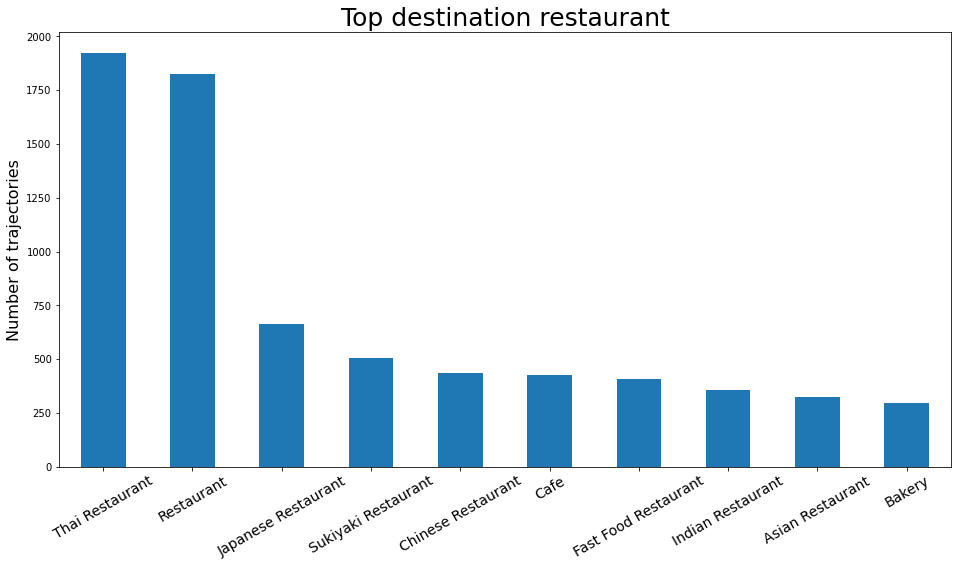

In [37]:
plt.figure(figsize = (16,8))
top_restaurant.plot.bar()
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Top destination restaurant", fontsize = 25)
plt.xticks(rotation = 30, fontsize = 14)
plt.show()

**Thai Restaurant tops the destination restaurants **

### Top 10 Nighclubs/Bar Destination

In [38]:
tourist = tourist.replace(["à¸ºBar"],"Bar")

In [39]:
nightclub = tourist["subcategory_d"].loc[tourist["category_d"] == "NightClub/Bar"]
club_val = nightclub.value_counts()
club_val

Karaoke Bar                    2928
Bar                            2052
Lounge                         1384
Nightclub                       702
Hotel Bar                       485
Pub                             427
ฺBar                            411
Gay Bar                         248
Cocktail Bar                    245
Jazz Club                       133
Beer Garden                     123
Café                            106
Diner                            69
Strip Club                       68
Arcade                           52
Professional & Other Places      48
Beer Bar                         44
Boutique                         39
Pab                              32
Music Venue                      29
Bistro                           27
Sports Bar                       26
Italian Restaurant               25
Buffet                           24
Dive Bar                         21
Gym / Fitness Center             16
Thai Restaurant                  11
Clothing Store              

In [40]:
top_nightclubs = club_val[:10]
top_nightclubs

Karaoke Bar     2928
Bar             2052
Lounge          1384
Nightclub        702
Hotel Bar        485
Pub              427
ฺBar             411
Gay Bar          248
Cocktail Bar     245
Jazz Club        133
Name: subcategory_d, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3642 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 3642 missing from current font.
  font.set_text(s, 0, flags=flags)


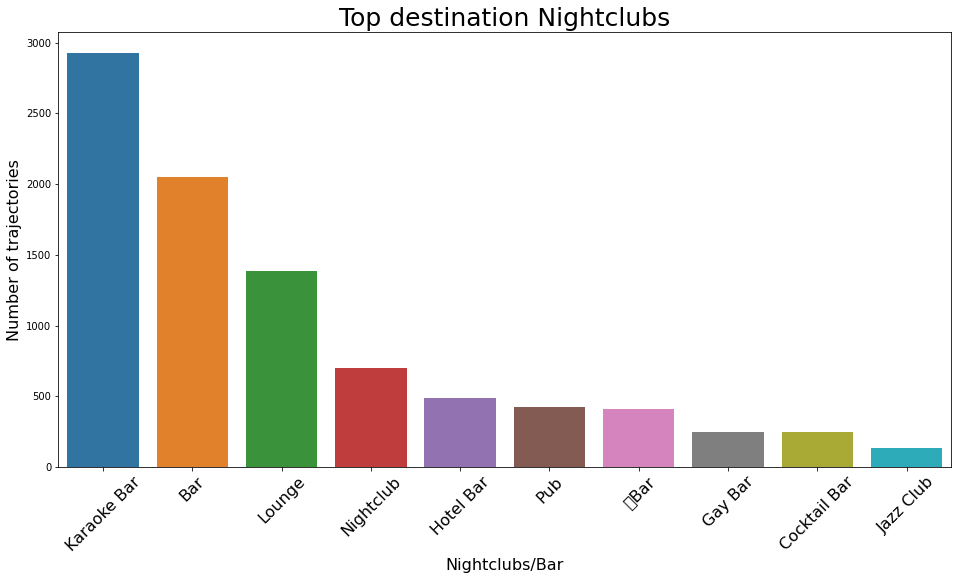

In [41]:
# import seaborn as sns

plt.figure(figsize = (16,8))
sns.barplot(top_nightclubs.index, top_nightclubs.values)
plt.xlabel("Nightclubs/Bar", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Top destination Nightclubs", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

**Karaoke Bar tops the list of nightclub destinations**

### Top 10 Shopping Destinaitons

In [42]:
spa = tourist["subcategory_d"].loc[tourist["category_d"] == "Spa"]
spa.value_counts()

Spa    9432
Name: subcategory_d, dtype: int64

In [43]:
shopping = tourist["subcategory_d"].loc[tourist["category_d"] == "Shopping Mall"]
shopping_val = shopping.value_counts()
shopping_val

Shopping Mall             1906
Supermarket                154
Market                     114
Shopping Plaza              90
Department Store            84
Flea Market                 71
Metro Station               67
Neighborhood                39
Food Court                  33
Medical Center              32
Road                        32
Automotive Shop             23
Mobile Phone Shop           20
Bus Station                 16
Food Truck                  16
Night Market                12
Furniture / Home Store       8
Indoor Play Area             6
Outlet Store                 5
Jewelry Shop                 4
Thai Restaurant              2
Outlet Mall                  2
Playground                   2
Housing Development          2
Name: subcategory_d, dtype: int64

In [44]:
top_shopping = shopping_val[:10]
top_shopping

Shopping Mall       1906
Supermarket          154
Market               114
Shopping Plaza        90
Department Store      84
Flea Market           71
Metro Station         67
Neighborhood          39
Food Court            33
Medical Center        32
Name: subcategory_d, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


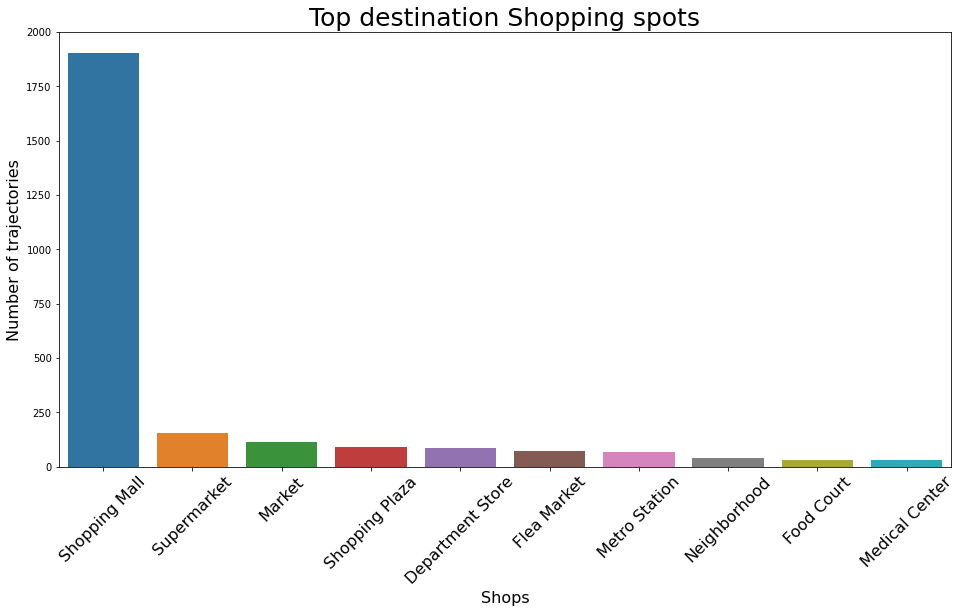

In [45]:
# import seaborn as sns

plt.figure(figsize = (16,8))
sns.barplot(top_shopping.index, top_shopping.values)
plt.xlabel("Shops", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Top destination Shopping spots", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

**Shopping Malls top the shopping destinations**

### Top religious and Leisure Destinations

In [46]:
religious = tourist["subcategory_d"].loc[tourist["category_d"] == "Religious"]
religious_val = religious.value_counts()
religious_val

Museum           500
Temple           297
Shrine            36
Historic Site     16
Palace             3
Name: subcategory_d, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


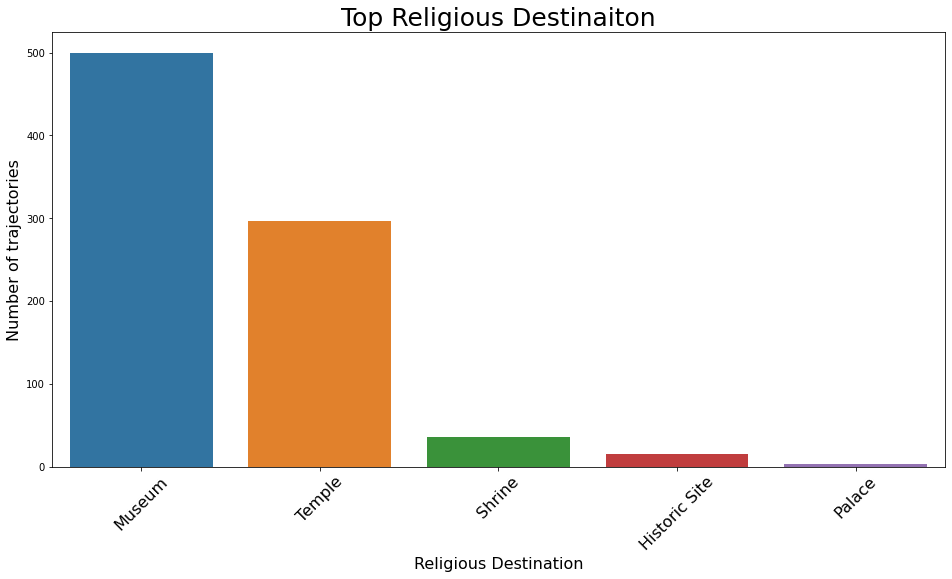

In [47]:
# import seaborn as sns

plt.figure(figsize = (16,8))
sns.barplot(religious_val.index, religious_val.values)
plt.xlabel("Religious Destination", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Top Religious Destinaiton", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

**Museum is the top religious destination**

In [48]:
leisure = tourist["subcategory_d"].loc[tourist["category_d"] == "Leisure"]
leisure_val = leisure.value_counts()
leisure_val

Neighborhood            47
Park                    42
Arts & Entertainment    25
Theme Park              25
Pedestrian Plaza        24
Memorial Site           20
Street Art              15
Theater                 10
Boutique                 7
Name: subcategory_d, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


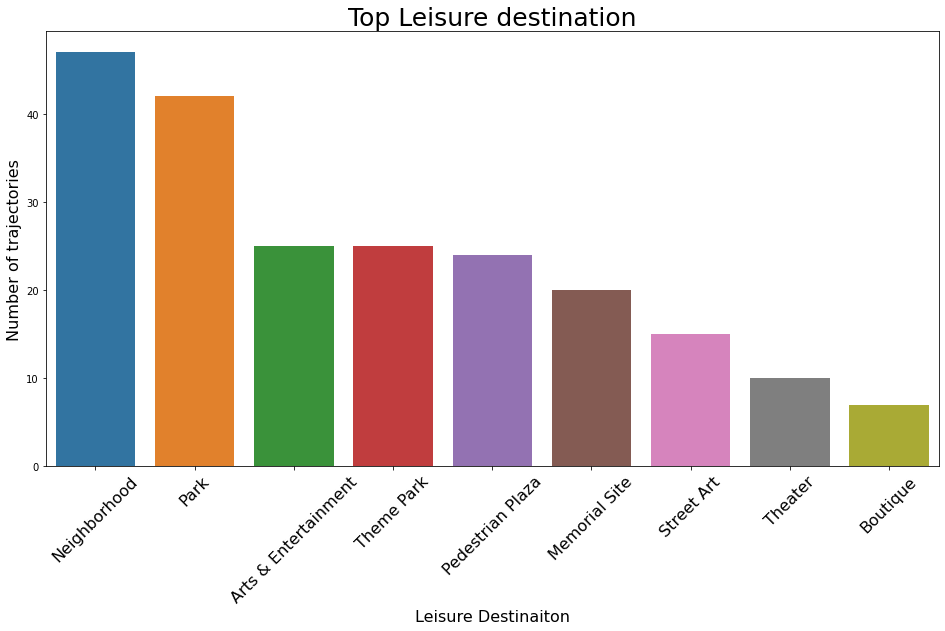

In [49]:
# import seaborn as sns

plt.figure(figsize = (16,8))
sns.barplot(leisure_val.index, leisure_val.values)
plt.xlabel("Leisure Destinaiton", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Top Leisure destination", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

**Neighbourhood is top spo for leisure activities**

### Tourist type analysis according to trajectory type

In [50]:
tourist.head()

,VehicleID,trajectory_id,date_time_o,date_time_d,category_o,subcategory_o,category_d,subcategory_d,lat_o,lon_o,lat_d,lon_d,distance,time_used,tourist_type,trajectory_type,masked_vehicle
0,6LurW0yL8xDb6eslP9L3U/VH62U,6LurW0yL8xDb6eslP9L3U/VH62U_trip_20190411202441,2019-04-11 20:24:41,2019-04-11 20:29:41,Accommodation,Hotel,NightClub/Bar,Karaoke Bar,13.66364,100.61409,13.66240,100.62025,682,5.00,High spending tourist,NightlifeTrip,402
1,OU+NtvniamKjJS7GdVebDYzVDqc,OU+NtvniamKjJS7GdVebDYzVDqc_trip_20190411131923,2019-04-11 13:19:23,2019-04-11 13:24:43,Accommodation,Hotel,Spa,Spa,13.66335,100.61517,13.66139,100.60623,1103,5.33,High spending tourist,SpaTrip,1314
2,XCBitNTVEv/xoXEjSQJ6utsCtr4,XCBitNTVEv/xoXEjSQJ6utsCtr4_trip_20190411132134,2019-04-11 13:21:34,2019-04-11 13:37:34,Accommodation,Hotel,Spa,Spa,13.66348,100.61439,13.67699,100.60824,5809,16.00,High spending tourist,SpaTrip,1788
3,pFPFjKr/IEz8P4UqUooLCaaxDRM,pFPFjKr/IEz8P4UqUooLCaaxDRM_trip_20190411153107,2019-04-11 15:31:07,2019-04-11 15:39:07,Accommodation,Hotel,Restaurant,Thai Restaurant,13.66378,100.61318,13.65897,100.60102,1844,8.00,High spending tourist,FoodAndDrinkTrip,2712
4,u2kp5kkoicvAyX1FC5S+L/+0/dY,u2kp5kkoicvAyX1FC5S+L/+0/dY_trip_20190411200322,2019-04-11 20:03:22,2019-04-11 20:16:18,Accommodation,Hotel,NightClub/Bar,Lounge,13.66310,100.61558,13.66840,100.63408,4259,12.93,High spending tourist,NightlifeTrip,2972


In [51]:
tourist_type_val = tourist["tourist_type"].value_counts()
tourist_type_val

High spending tourist          28919
Economical spending tourist     4110
Name: tourist_type, dtype: int64

**Most tourists tend to spend high **

In [52]:
trajectory_type_val = tourist["trajectory_type"].value_counts()
trajectory_type_val

FoodAndDrinkTrip    9982
NightlifeTrip       9808
SpaTrip             9432
ShoppingTrip        2740
ReligiousTrip        852
LeisureTrip          215
Name: trajectory_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


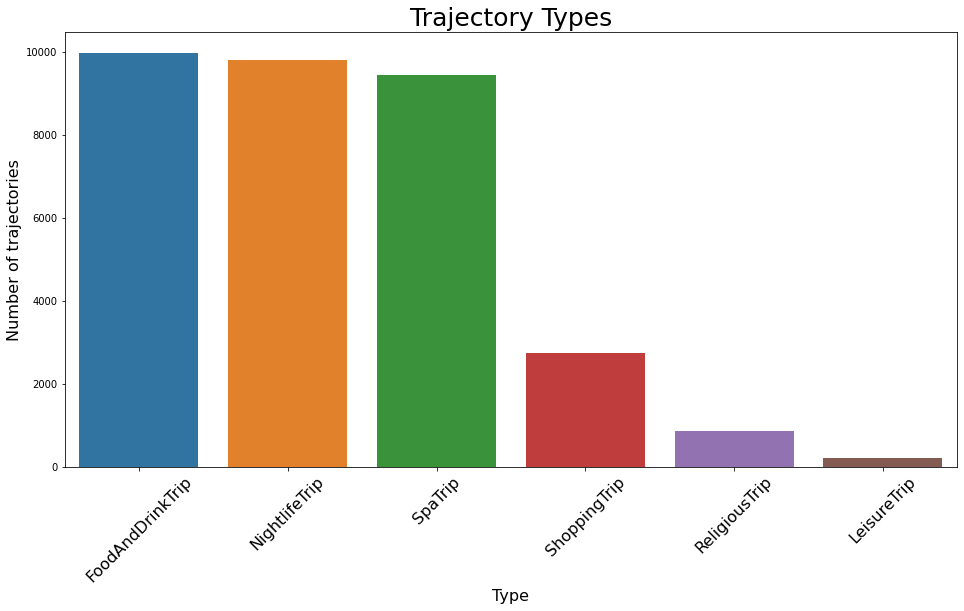

In [53]:
# import seaborn as sns

plt.figure(figsize = (16,8))
sns.barplot(trajectory_type_val.index, trajectory_type_val.values)
plt.xlabel("Type", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Trajectory Types", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

In [54]:
high_spending = tourist["trajectory_type"].loc[tourist["tourist_type"] == "High spending tourist"]
high_spending_val = high_spending.value_counts()
high_spending_val

FoodAndDrinkTrip    8788
NightlifeTrip       8531
SpaTrip             8329
ShoppingTrip        2391
ReligiousTrip        704
LeisureTrip          176
Name: trajectory_type, dtype: int64

Text(0.5, 1.0, 'High spending tourist trip type')

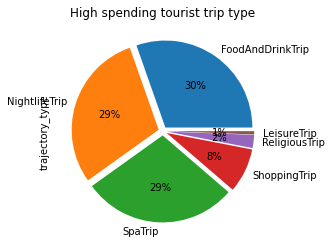

In [55]:
ax = high_spending_val.plot(kind = 'pie',autopct = '%1.0f%%',explode = (0.05,0.05,0.05,0.05,0.05,0.05))
ax.set_title("High spending tourist trip type")
# ax.get_anchor()

In [56]:
economical_spending = tourist["trajectory_type"].loc[tourist["tourist_type"] == "Economical spending tourist"]
economical_spending_val = economical_spending.value_counts()
economical_spending_val

NightlifeTrip       1277
FoodAndDrinkTrip    1194
SpaTrip             1103
ShoppingTrip         349
ReligiousTrip        148
LeisureTrip           39
Name: trajectory_type, dtype: int64

Text(0.5, 1.0, 'economical spending tourist trip type')

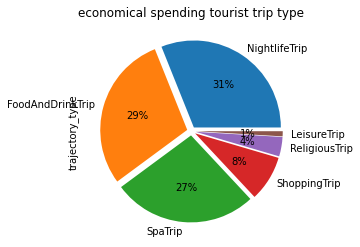

In [57]:
ax1 = economical_spending_val.plot(kind = 'pie',autopct = '%1.0f%%',explode = (0.05,0.05,0.05,0.05,0.05,0.05))
ax1.set_title("economical spending tourist trip type")
# ax.get_anchor()

### Trajectory analysis by time used and distance covered

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


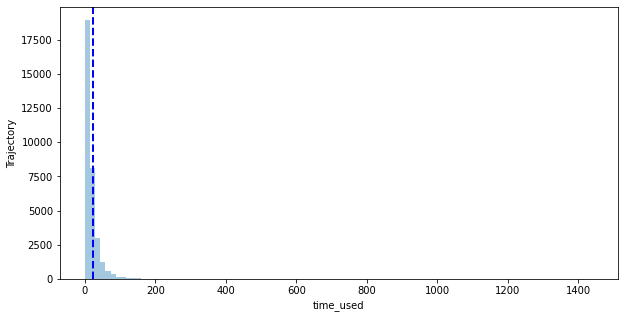

In [58]:
plt.figure(figsize=(10,5))
# plt.xlim(0,2000)
plt.xlabel('Time used')
plt.ylabel('Trajectory')
sns.distplot(tourist['time_used'],bins = 100, kde=False)
plt.axvline(tourist['time_used'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


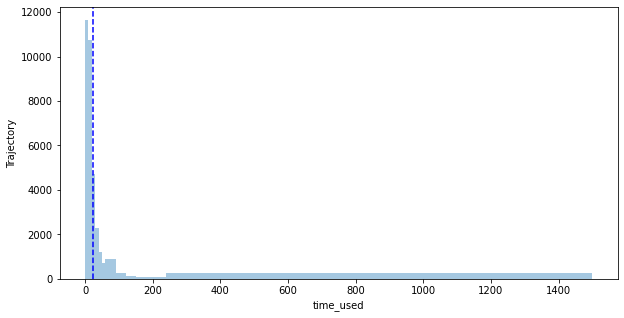

In [59]:
plt.figure(figsize=(10,5))
# plt.xlim(0,2000)
plt.xlabel('Time used')
plt.ylabel('Trajectory')
# bins = [0,10,20,30,40,50,60,90,120,150,180,240,300,360,420,480,1500]
bins = [0,10,20,30,40,50,60,90,120,150,180,240,1500]

sns.distplot(tourist['time_used'],bins = bins, kde=False)
plt.axvline(tourist['time_used'].mean(), color='b', linestyle='dashed', linewidth=1.5)
plt.show()

In [60]:
mean_time = tourist['time_used'].mean()
max_time = tourist['time_used'].max()
min_time = tourist['time_used'].min()
std_time = tourist["time_used"].std()

val = [mean_time, max_time, min_time,std_time]

val

[23.855624148475837, 1439.9, 1.05, 55.04731885538382]

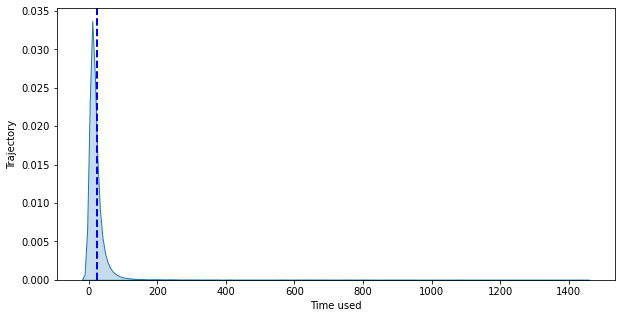

In [61]:
plt.figure(figsize=(10,5))
# plt.xlim(0,2000)
plt.xlabel('Time used')
plt.ylabel('Trajectory')
sns.kdeplot(tourist['time_used'],shade = True)
plt.axvline(tourist['time_used'].mean(), color='b', linestyle='dashed', linewidth=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


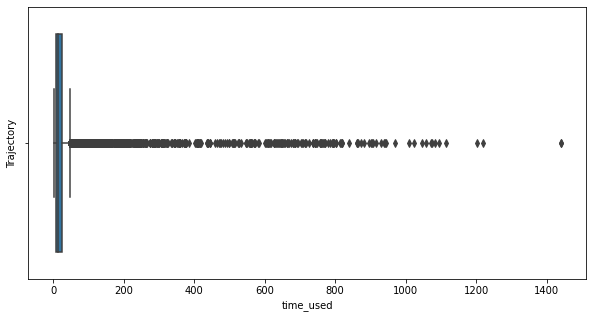

In [62]:
plt.figure(figsize=(10,5))
# plt.xlim(0,2000)
plt.xlabel('Time used')
plt.ylabel('Trajectory')
sns.boxplot(tourist['time_used'])
plt.show()

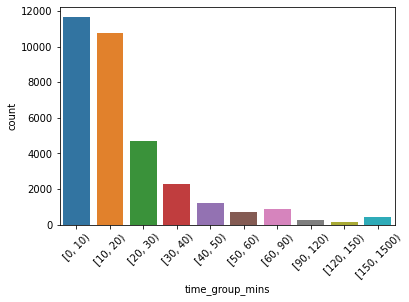

In [63]:
bins = [0,10,20,30,40,50,60,90,120,150,1500]

df_test = pd.DataFrame({'time': tourist['time_used'], 
                        'time_group_mins': pd.cut(tourist['time_used'], bins=bins, right=False)})

ax2 = sns.countplot(data=df_test, x='time_group_mins')
ax2.tick_params(axis='x', labelrotation=45)

**Most trajectories used 0 to 20 mins of time to reach destination**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


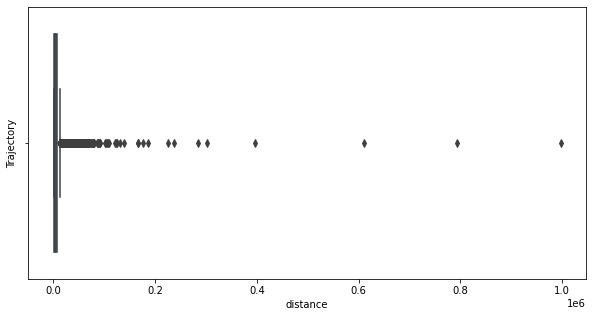

In [64]:
plt.figure(figsize=(10,5))
# plt.xlim(0,2000)
plt.xlabel('Time used')
plt.ylabel('Trajectory')
sns.boxplot(tourist['distance'])
plt.show()

In [65]:
mean_distance = tourist['distance'].mean()
max_distance = tourist['distance'].max()
min_distance = tourist['distance'].min()
std_distance = tourist['distance'].std()

val1 = [mean_distance, max_distance, min_distance,std_distance]

val1

[5457.90163189924, 997684, 501, 10735.314645412687]

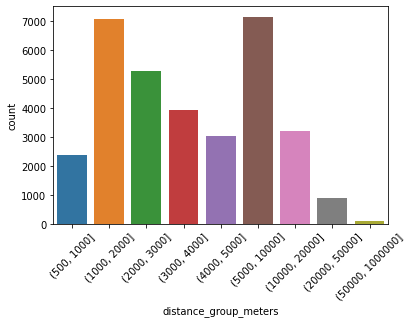

In [66]:
binsd = [500,1000,2000,3000,4000,5000,10000,20000,50000,1000000]

df1_test = pd.DataFrame({'distance': tourist['distance'], 
                        'distance_group_meters': pd.cut(tourist['distance'], bins=binsd)})

ax3 = sns.countplot(data=df1_test, x='distance_group_meters')
ax3.tick_params(axis='x', labelrotation=45)

**Most trajectories distance covered was between 5 to 10 kms and secondmost distance covered was 1 to 2 kms**

In [67]:
import plotly.graph_objects as go

In [68]:
fig = go.Figure(data=go.Scattergeo(
        lon = tourist['lon_o'],
        lat = tourist['lat_o'],
        mode = 'markers'
        ))
fig.update_layout(
        title = '',
        geo_scope='asia',
    )
fig.show()

In [117]:
!pip install geopandas
import geopandas as gpd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###Taxi Data Cleaning and Pre-Processing 

In [70]:
taxi.head()

,VehicleID_x,gpsvalid_x,lat_x,lon_x,date_time_x,speed_x,heading_x,for_hire_light_x,engine_acc_x,geometry_x,...,gpsvalid_y,lat_y,lon_y,date_time_y,speed_y,heading_y,for_hire_light_y,engine_acc_y,geometry_y,trip_point_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64769,100.78991,2019-04-01 12:04:05,3,177,0,1,POINT (100.78991 13.64769),...,1,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,1,POINT (100.78381 13.65319),end
1,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64767,100.67939,2019-04-01 12:37:05,5,189,0,1,POINT (100.67939 13.64767),...,1,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,1,POINT (100.67389 13.67083),end
2,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.65371,100.67874,2019-04-01 13:17:05,0,184,0,1,POINT (100.67874 13.65371),...,1,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,1,POINT (100.67092 13.69173),end
3,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.68211,100.61034,2019-04-01 14:01:05,16,9,0,1,POINT (100.61034 13.68211),...,1,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,1,POINT (100.59269 13.71405),end
4,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.74752,100.57965,2019-04-01 14:43:05,0,117,0,1,POINT (100.57965 13.74752),...,1,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,1,POINT (100.59861 13.74763),end


In [71]:
print(pd.isnull(taxi).sum())

VehicleID_x         0
gpsvalid_x          0
lat_x               0
lon_x               0
date_time_x         0
speed_x             0
heading_x           0
for_hire_light_x    0
engine_acc_x        0
geometry_x          0
trip_point_x        0
trajectory_id       0
VehicleID_y         0
gpsvalid_y          0
lat_y               0
lon_y               0
date_time_y         0
speed_y             0
heading_y           0
for_hire_light_y    0
engine_acc_y        0
geometry_y          0
trip_point_y        0
dtype: int64


In [72]:
taxi = taxi[taxi['gpsvalid_y'].notna()]

In [73]:
print(pd.isnull(taxi).sum())

VehicleID_x         0
gpsvalid_x          0
lat_x               0
lon_x               0
date_time_x         0
speed_x             0
heading_x           0
for_hire_light_x    0
engine_acc_x        0
geometry_x          0
trip_point_x        0
trajectory_id       0
VehicleID_y         0
gpsvalid_y          0
lat_y               0
lon_y               0
date_time_y         0
speed_y             0
heading_y           0
for_hire_light_y    0
engine_acc_y        0
geometry_y          0
trip_point_y        0
dtype: int64


In [74]:
print(len(pd.unique(taxi["gpsvalid_x"])))
print(len(pd.unique(taxi["gpsvalid_y"])))
print(len(pd.unique(taxi["for_hire_light_x"])))
print(len(pd.unique(taxi["for_hire_light_y"])))
print(len(pd.unique(taxi["engine_acc_x"])))
print(len(pd.unique(taxi["engine_acc_y"])))
print(len(pd.unique(taxi["trip_point_x"])))
print(len(pd.unique(taxi["trip_point_y"])))


2
2
1
1
2
2
1
1


In [75]:
taxi

,VehicleID_x,gpsvalid_x,lat_x,lon_x,date_time_x,speed_x,heading_x,for_hire_light_x,engine_acc_x,geometry_x,...,gpsvalid_y,lat_y,lon_y,date_time_y,speed_y,heading_y,for_hire_light_y,engine_acc_y,geometry_y,trip_point_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64769,100.78991,2019-04-01 12:04:05,3,177,0,1,POINT (100.78991 13.64769),...,1,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,1,POINT (100.78381 13.65319),end
1,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64767,100.67939,2019-04-01 12:37:05,5,189,0,1,POINT (100.67939 13.64767),...,1,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,1,POINT (100.67389 13.67083),end
2,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.65371,100.67874,2019-04-01 13:17:05,0,184,0,1,POINT (100.67874 13.65371),...,1,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,1,POINT (100.67092 13.69173),end
3,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.68211,100.61034,2019-04-01 14:01:05,16,9,0,1,POINT (100.61034 13.68211),...,1,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,1,POINT (100.59269 13.71405),end
4,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.74752,100.57965,2019-04-01 14:43:05,0,117,0,1,POINT (100.57965 13.74752),...,1,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,1,POINT (100.59861 13.74763),end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239757,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.79392,100.71340,1963-07-17 12:43:27,17,327,0,1,POINT (100.7134 13.79392),...,1,13.77354,100.66722,1963-07-17 13:13:15,24,258,1,1,POINT (100.66722 13.77354),end
239758,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.74967,100.64914,1963-07-17 13:51:15,59,301,0,1,POINT (100.64914 13.74967),...,1,13.76105,100.63039,1963-07-17 14:08:15,37,85,1,1,POINT (100.63039 13.76105),end
239759,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.75243,100.63416,1963-07-17 15:22:17,35,102,0,1,POINT (100.63416 13.75243),...,1,13.76639,100.64610,1963-07-17 15:41:17,26,87,1,1,POINT (100.6461 13.76639),end
239760,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.77795,100.65685,1963-07-17 15:48:17,0,7,0,1,POINT (100.65685 13.77795),...,1,13.76777,100.65056,1963-07-17 16:07:43,37,226,1,1,POINT (100.65056 13.76777),end


In [76]:
trip_point_y_val = taxi["trip_point_y"].value_counts()
trip_point_y_val

end    239762
Name: trip_point_y, dtype: int64

In [77]:
taxi = taxi[taxi['trip_point_y'].notna()]
taxi

,VehicleID_x,gpsvalid_x,lat_x,lon_x,date_time_x,speed_x,heading_x,for_hire_light_x,engine_acc_x,geometry_x,...,gpsvalid_y,lat_y,lon_y,date_time_y,speed_y,heading_y,for_hire_light_y,engine_acc_y,geometry_y,trip_point_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64769,100.78991,2019-04-01 12:04:05,3,177,0,1,POINT (100.78991 13.64769),...,1,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,1,POINT (100.78381 13.65319),end
1,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.64767,100.67939,2019-04-01 12:37:05,5,189,0,1,POINT (100.67939 13.64767),...,1,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,1,POINT (100.67389 13.67083),end
2,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.65371,100.67874,2019-04-01 13:17:05,0,184,0,1,POINT (100.67874 13.65371),...,1,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,1,POINT (100.67092 13.69173),end
3,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.68211,100.61034,2019-04-01 14:01:05,16,9,0,1,POINT (100.61034 13.68211),...,1,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,1,POINT (100.59269 13.71405),end
4,++DSqYQ5x328LHUqejEnMt1Ari0,1,13.74752,100.57965,2019-04-01 14:43:05,0,117,0,1,POINT (100.57965 13.74752),...,1,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,1,POINT (100.59861 13.74763),end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239757,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.79392,100.71340,1963-07-17 12:43:27,17,327,0,1,POINT (100.7134 13.79392),...,1,13.77354,100.66722,1963-07-17 13:13:15,24,258,1,1,POINT (100.66722 13.77354),end
239758,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.74967,100.64914,1963-07-17 13:51:15,59,301,0,1,POINT (100.64914 13.74967),...,1,13.76105,100.63039,1963-07-17 14:08:15,37,85,1,1,POINT (100.63039 13.76105),end
239759,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.75243,100.63416,1963-07-17 15:22:17,35,102,0,1,POINT (100.63416 13.75243),...,1,13.76639,100.64610,1963-07-17 15:41:17,26,87,1,1,POINT (100.6461 13.76639),end
239760,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,1,13.77795,100.65685,1963-07-17 15:48:17,0,7,0,1,POINT (100.65685 13.77795),...,1,13.76777,100.65056,1963-07-17 16:07:43,37,226,1,1,POINT (100.65056 13.76777),end


In [78]:
gpsvalid_y_val = taxi["gpsvalid_y"].value_counts()
gpsvalid_y_val

1    238874
0       888
Name: gpsvalid_y, dtype: int64

In [79]:
gpsvalid_x_val = taxi["gpsvalid_x"].value_counts()
gpsvalid_x_val

1    238737
0      1025
Name: gpsvalid_x, dtype: int64

In [80]:
engine_acc_x_val = taxi["engine_acc_x"].value_counts()
engine_acc_x_val

1    232217
0      7545
Name: engine_acc_x, dtype: int64

In [81]:
engine_acc_y_val = taxi["engine_acc_y"].value_counts()
engine_acc_y_val

1    217792
0     21970
Name: engine_acc_y, dtype: int64

In [82]:
gpsvalid_x_false = taxi.loc[taxi['gpsvalid_x']==0 ]
gpsvalid_x_false

,VehicleID_x,gpsvalid_x,lat_x,lon_x,date_time_x,speed_x,heading_x,for_hire_light_x,engine_acc_x,geometry_x,...,gpsvalid_y,lat_y,lon_y,date_time_y,speed_y,heading_y,for_hire_light_y,engine_acc_y,geometry_y,trip_point_y
642,08qE7nf/NpEuFJKE75Qmnh6b4iI,0,13.78924,100.55868,2019-04-01 03:34:09,0,8,0,1,POINT (100.55868 13.78924),...,1,13.76072,100.53799,2019-04-01 03:51:41,0,126,1,1,POINT (100.53799 13.76072),end
659,09sfklXq+XABNa71Pi5zqkfwVv8,0,13.74210,100.56203,2019-04-01 01:43:01,13,326,0,1,POINT (100.56203 13.7421),...,1,13.73235,100.58241,2019-04-01 02:00:27,0,20,1,1,POINT (100.58241 13.73235),end
1029,15CKLg0jYSxuU3EzWozOvMIYaRw,0,13.81776,100.56094,2019-04-01 22:00:11,13,188,0,1,POINT (100.56094 13.81776),...,1,13.81022,100.53572,2019-04-01 22:18:11,1,264,1,1,POINT (100.53572 13.81022),end
1402,1Y2GDOaUg77Jc3fv5ihIdp1/jWE,0,13.66945,100.45186,2019-04-01 09:26:16,9,216,0,1,POINT (100.45186 13.66945),...,1,13.67633,100.45707,2019-04-01 09:36:11,0,81,1,1,POINT (100.45707 13.67633),end
1431,1/niyd4q7hULY2lj/XJMl1UK7RI,0,13.64835,100.67969,2019-04-01 11:18:15,18,220,0,1,POINT (100.67969 13.64835),...,1,13.61567,100.65648,2019-04-01 11:44:03,0,108,1,1,POINT (100.65648 13.61567),end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239513,/RNEzXgIju4DAk7rtZ3CEgRkt1I,0,13.71423,100.48031,2019-04-07 09:06:40,3,74,0,1,POINT (100.48031 13.71423),...,1,13.71089,100.48764,2019-04-07 09:11:26,45,19,1,1,POINT (100.48764 13.71089),end
239589,/sV61Q0Q+LHuZm3AXkrMPOdEU7A,0,13.76051,100.62495,2019-04-07 06:39:19,0,85,0,1,POINT (100.62495 13.76051),...,1,13.75500,100.61401,2019-04-07 07:10:30,0,231,1,1,POINT (100.61401 13.755),end
239593,/sV61Q0Q+LHuZm3AXkrMPOdEU7A,0,13.73019,100.58133,2019-04-07 08:19:45,41,198,0,1,POINT (100.58133 13.73019),...,1,13.75307,100.60965,2019-04-07 08:45:22,33,137,1,1,POINT (100.60965 13.75307),end
239599,/sV61Q0Q+LHuZm3AXkrMPOdEU7A,0,13.85110,100.61785,2019-04-07 20:40:21,6,321,0,1,POINT (100.61785 13.8511),...,0,13.81489,100.56111,2019-04-07 21:10:07,0,205,1,1,POINT (100.56111 13.81489),end


In [83]:
gpsvalid_y_false = taxi.loc[taxi['gpsvalid_y']==0 ]
gpsvalid_y_false

,VehicleID_x,gpsvalid_x,lat_x,lon_x,date_time_x,speed_x,heading_x,for_hire_light_x,engine_acc_x,geometry_x,...,gpsvalid_y,lat_y,lon_y,date_time_y,speed_y,heading_y,for_hire_light_y,engine_acc_y,geometry_y,trip_point_y
671,09sfklXq+XABNa71Pi5zqkfwVv8,1,13.72411,100.56611,2019-04-01 21:33:51,4,220,0,1,POINT (100.56611 13.72411),...,0,13.73130,100.56804,2019-04-01 21:42:21,4,141,1,1,POINT (100.56804 13.7313),end
1028,15CKLg0jYSxuU3EzWozOvMIYaRw,1,13.81075,100.53681,2019-04-01 17:36:10,0,70,0,1,POINT (100.53681 13.81075),...,0,13.81776,100.56094,2019-04-01 18:24:08,13,188,1,1,POINT (100.56094 13.81776),end
1101,1d6je89eOMiidw5uV879a55bAKM,1,13.72252,100.75223,2019-03-31 23:58:34,0,286,0,0,POINT (100.75223 13.72252),...,0,13.69352,100.74970,2019-04-01 01:42:13,6,271,1,1,POINT (100.7497 13.69352),end
1346,1TRABCa8tBYUOGXe8E53a2xG92U,1,13.81866,100.53814,2019-04-01 05:03:44,0,66,0,1,POINT (100.53814 13.81866),...,0,13.72291,100.74277,2019-04-01 08:13:31,0,76,1,0,POINT (100.74277 13.72291),end
1610,2c5sXCwGe63XwPtJPMzYY9cLoZ8,1,13.70734,100.53796,2019-04-01 10:37:16,0,237,0,1,POINT (100.53796 13.70734),...,0,13.70967,100.51226,2019-04-01 11:04:22,25,289,1,1,POINT (100.51226 13.70967),end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238886,ZQUkglCcbNJEWktVT8t+E5f84vo,1,13.82540,100.53188,2019-04-07 15:21:08,28,133,0,1,POINT (100.53188 13.8254),...,0,13.77368,100.49225,2019-04-07 15:49:59,4,22,1,1,POINT (100.49225 13.77368),end
239147,/2G13WOyQqduX+ks3fJ4PkzsSSU,1,13.70184,100.48450,2019-04-07 11:29:42,37,19,0,1,POINT (100.4845 13.70184),...,0,13.72847,100.47392,2019-04-07 11:39:34,3,202,1,1,POINT (100.47392 13.72847),end
239591,/sV61Q0Q+LHuZm3AXkrMPOdEU7A,1,13.74585,100.55371,2019-04-07 07:45:08,15,159,0,1,POINT (100.55371 13.74585),...,0,13.74876,100.56333,2019-04-07 07:56:20,0,13,1,1,POINT (100.56333 13.74876),end
239592,/sV61Q0Q+LHuZm3AXkrMPOdEU7A,1,13.73729,100.62667,2019-04-07 08:04:23,54,87,0,1,POINT (100.62667 13.73729),...,0,13.73710,100.61027,2019-04-07 08:11:27,67,291,1,1,POINT (100.61027 13.7371),end


In [84]:
taxi.shape

(239762, 23)

In [85]:
taxi  = taxi[taxi['gpsvalid_x'] != 0]
taxi.shape

(238737, 23)

In [86]:
taxi  = taxi[taxi['gpsvalid_y'] != 0]
taxi.shape

(237963, 23)

In [87]:
print(len(pd.unique(taxi["gpsvalid_x"])))
print(len(pd.unique(taxi["gpsvalid_y"])))
print(len(pd.unique(taxi["for_hire_light_x"])))
print(len(pd.unique(taxi["for_hire_light_y"])))
print(len(pd.unique(taxi["engine_acc_x"])))
print(len(pd.unique(taxi["engine_acc_y"])))
print(len(pd.unique(taxi["trip_point_x"])))
print(len(pd.unique(taxi["trip_point_y"])))


1
1
1
1
2
2
1
1


In [88]:
taxi = taxi.drop(['gpsvalid_x','gpsvalid_y','for_hire_light_x','for_hire_light_x','for_hire_light_y','trip_point_x','trip_point_y'],axis = 1)
taxi.head()

,VehicleID_x,lat_x,lon_x,date_time_x,speed_x,heading_x,engine_acc_x,geometry_x,trajectory_id,VehicleID_y,lat_y,lon_y,date_time_y,speed_y,heading_y,engine_acc_y,geometry_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,13.64769,100.78991,2019-04-01 12:04:05,3,177,1,POINT (100.78991 13.64769),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401120405,++DSqYQ5x328LHUqejEnMt1Ari0,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,POINT (100.78381 13.65319)
1,++DSqYQ5x328LHUqejEnMt1Ari0,13.64767,100.67939,2019-04-01 12:37:05,5,189,1,POINT (100.67939 13.64767),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401123705,++DSqYQ5x328LHUqejEnMt1Ari0,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,POINT (100.67389 13.67083)
2,++DSqYQ5x328LHUqejEnMt1Ari0,13.65371,100.67874,2019-04-01 13:17:05,0,184,1,POINT (100.67874 13.65371),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401131705,++DSqYQ5x328LHUqejEnMt1Ari0,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,POINT (100.67092 13.69173)
3,++DSqYQ5x328LHUqejEnMt1Ari0,13.68211,100.61034,2019-04-01 14:01:05,16,9,1,POINT (100.61034 13.68211),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401140105,++DSqYQ5x328LHUqejEnMt1Ari0,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,POINT (100.59269 13.71405)
4,++DSqYQ5x328LHUqejEnMt1Ari0,13.74752,100.57965,2019-04-01 14:43:05,0,117,1,POINT (100.57965 13.74752),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401144305,++DSqYQ5x328LHUqejEnMt1Ari0,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,POINT (100.59861 13.74763)


In [89]:
demo = taxi[taxi['VehicleID_x'] != taxi['VehicleID_y']]
demo

,VehicleID_x,lat_x,lon_x,date_time_x,speed_x,heading_x,engine_acc_x,geometry_x,trajectory_id,VehicleID_y,lat_y,lon_y,date_time_y,speed_y,heading_y,engine_acc_y,geometry_y


In [90]:
taxi.shape

(237963, 17)

In [91]:
taxi = taxi.drop(['VehicleID_y'],axis=1)
taxi.rename(columns = {'VehicleID_x':'VehicleID'}, inplace = True)
taxi.head()

,VehicleID,lat_x,lon_x,date_time_x,speed_x,heading_x,engine_acc_x,geometry_x,trajectory_id,lat_y,lon_y,date_time_y,speed_y,heading_y,engine_acc_y,geometry_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,13.64769,100.78991,2019-04-01 12:04:05,3,177,1,POINT (100.78991 13.64769),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401120405,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,POINT (100.78381 13.65319)
1,++DSqYQ5x328LHUqejEnMt1Ari0,13.64767,100.67939,2019-04-01 12:37:05,5,189,1,POINT (100.67939 13.64767),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401123705,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,POINT (100.67389 13.67083)
2,++DSqYQ5x328LHUqejEnMt1Ari0,13.65371,100.67874,2019-04-01 13:17:05,0,184,1,POINT (100.67874 13.65371),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401131705,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,POINT (100.67092 13.69173)
3,++DSqYQ5x328LHUqejEnMt1Ari0,13.68211,100.61034,2019-04-01 14:01:05,16,9,1,POINT (100.61034 13.68211),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401140105,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,POINT (100.59269 13.71405)
4,++DSqYQ5x328LHUqejEnMt1Ari0,13.74752,100.57965,2019-04-01 14:43:05,0,117,1,POINT (100.57965 13.74752),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401144305,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,POINT (100.59861 13.74763)


In [92]:
taxi_new = taxi.copy()

In [93]:
taxi_new

,VehicleID,lat_x,lon_x,date_time_x,speed_x,heading_x,engine_acc_x,geometry_x,trajectory_id,lat_y,lon_y,date_time_y,speed_y,heading_y,engine_acc_y,geometry_y
0,++DSqYQ5x328LHUqejEnMt1Ari0,13.64769,100.78991,2019-04-01 12:04:05,3,177,1,POINT (100.78991 13.64769),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401120405,13.65319,100.78381,2019-04-01 12:10:05,26,141,1,POINT (100.78381 13.65319)
1,++DSqYQ5x328LHUqejEnMt1Ari0,13.64767,100.67939,2019-04-01 12:37:05,5,189,1,POINT (100.67939 13.64767),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401123705,13.67083,100.67389,2019-04-01 13:02:05,10,289,1,POINT (100.67389 13.67083)
2,++DSqYQ5x328LHUqejEnMt1Ari0,13.65371,100.67874,2019-04-01 13:17:05,0,184,1,POINT (100.67874 13.65371),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401131705,13.69173,100.67092,2019-04-01 13:39:05,40,207,1,POINT (100.67092 13.69173)
3,++DSqYQ5x328LHUqejEnMt1Ari0,13.68211,100.61034,2019-04-01 14:01:05,16,9,1,POINT (100.61034 13.68211),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401140105,13.71405,100.59269,2019-04-01 14:16:05,7,309,1,POINT (100.59269 13.71405)
4,++DSqYQ5x328LHUqejEnMt1Ari0,13.74752,100.57965,2019-04-01 14:43:05,0,117,1,POINT (100.57965 13.74752),++DSqYQ5x328LHUqejEnMt1Ari0_trip_20190401144305,13.74763,100.59861,2019-04-01 14:58:05,0,201,1,POINT (100.59861 13.74763)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239757,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.79392,100.71340,1963-07-17 12:43:27,17,327,1,POINT (100.7134 13.79392),//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717124327,13.77354,100.66722,1963-07-17 13:13:15,24,258,1,POINT (100.66722 13.77354)
239758,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.74967,100.64914,1963-07-17 13:51:15,59,301,1,POINT (100.64914 13.74967),//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717135115,13.76105,100.63039,1963-07-17 14:08:15,37,85,1,POINT (100.63039 13.76105)
239759,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.75243,100.63416,1963-07-17 15:22:17,35,102,1,POINT (100.63416 13.75243),//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717152217,13.76639,100.64610,1963-07-17 15:41:17,26,87,1,POINT (100.6461 13.76639)
239760,//wVqd1wQ3ygnNSpDFZ1PV8PxrE,13.77795,100.65685,1963-07-17 15:48:17,0,7,1,POINT (100.65685 13.77795),//wVqd1wQ3ygnNSpDFZ1PV8PxrE_trip_19630717154817,13.76777,100.65056,1963-07-17 16:07:43,37,226,1,POINT (100.65056 13.76777)


###Time series analysis of taxi data

In [94]:
taxi_new['Date_x'] = pd.to_datetime(taxi_new['date_time_x']).dt.date

In [95]:
taxi_new['Time_x'] = pd.to_datetime(taxi_new['date_time_x']).dt.time
taxi_new['Date_y'] = pd.to_datetime(taxi_new['date_time_y']).dt.date
taxi_new['Time_y'] = pd.to_datetime(taxi_new['date_time_y']).dt.time

In [96]:
taxi_new.dtypes

VehicleID         object
lat_x            float64
lon_x            float64
date_time_x       object
speed_x            int64
heading_x          int64
engine_acc_x       int64
geometry_x        object
trajectory_id     object
lat_y            float64
lon_y            float64
date_time_y       object
speed_y            int64
heading_y          int64
engine_acc_y       int64
geometry_y        object
Date_x            object
Time_x            object
Date_y            object
Time_y            object
dtype: object

In [97]:
taxi_new['date_time_x'] = pd.to_datetime(taxi_new['date_time_x'])
taxi_new['Date_x'] = pd.to_datetime(taxi_new['Date_x'])
taxi_new['date_time_y'] = pd.to_datetime(taxi_new['date_time_y'])


In [98]:
taxi_new['year_x']= taxi_new['Date_x'].dt.year
taxi_new['month_x']= taxi_new['Date_x'].dt.month
taxi_new['day_x']= taxi_new['Date_x'].dt.day


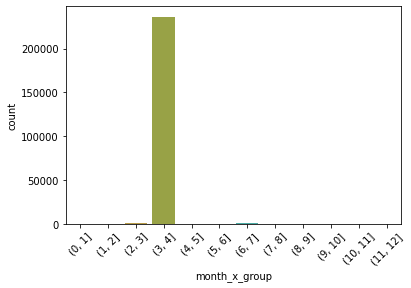

In [99]:
binsd = [0,1,2,3,4,5,6,7,8,9,10,11,12]

df4_test = pd.DataFrame({'month_x': taxi_new['year_x'], 
                        'month_x_group': pd.cut(taxi_new['month_x'], bins=binsd)})

ax4 = sns.countplot(data=df4_test, x='month_x_group')
ax4.tick_params(axis='x', labelrotation=45)

Most data is from month of APRIL 

###Average trip speed in different hours of the day

In [100]:
mean_x = taxi_new.groupby(taxi_new["date_time_x"].dt.hour)["speed_x"].mean()
mean_x = mean_x.to_frame()
mean_x['hour'] = mean_x.index
mean_x.dtypes

speed_x    float64
hour         int64
dtype: object

In [101]:
mean_y = taxi_new.groupby(taxi_new["date_time_y"].dt.hour)["speed_y"].mean()
mean_y = mean_y.to_frame()
mean_y['hour_y'] = mean_y.index

mean_y.dtypes

speed_y    float64
hour_y       int64
dtype: object

In [102]:
mean_speed = pd.concat([mean_x, mean_y], axis=1)


Text(0.5, 1.0, 'Mean speed at x and y in different hours of the day')

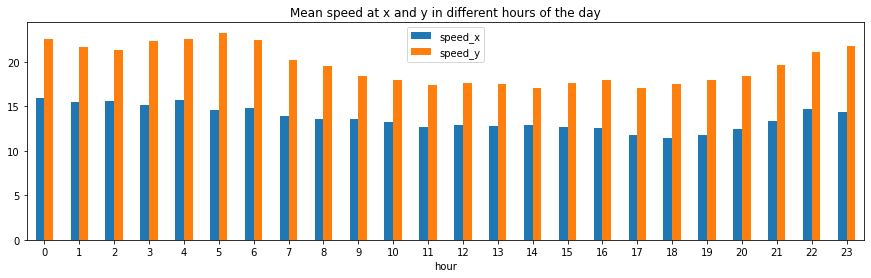

In [103]:
fig, axs = plt.subplots(figsize=(15, 4))

mean_speed.plot(x="hour", y=["speed_x", "speed_y"], kind="bar",rot = 0 , ax = axs)
plt.title('Mean speed at x and y in different hours of the day')


In [104]:
max_x = taxi_new.groupby(taxi_new["date_time_x"].dt.hour)["speed_x"].max()
max_x = max_x.to_frame()
max_x['hour'] = max_x.index
max_x.dtypes

speed_x    int64
hour       int64
dtype: object

In [105]:
max_y = taxi_new.groupby(taxi_new["date_time_y"].dt.hour)["speed_y"].max()
max_y = max_y.to_frame()
max_y['hour_y'] = max_y.index
max_y.dtypes

speed_y    int64
hour_y     int64
dtype: object

In [106]:
max_speed = pd.concat([max_x, max_y], axis=1)

Text(0.5, 1.0, 'Max speed at x and y in different hours of the day')

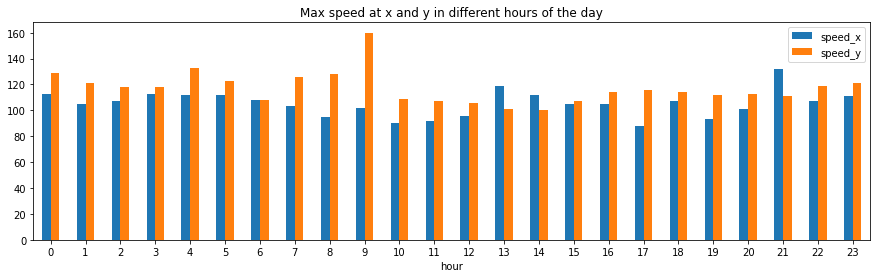

In [107]:
fig, axs = plt.subplots(figsize=(15, 4))

max_speed.plot(x="hour", y=["speed_x", "speed_y"], kind="bar",rot = 0 , ax = axs)
plt.title('Max speed at x and y in different hours of the day')


###Number of trips in different hours of the day

In [108]:
taxi_new['hour_x'] = taxi_new["date_time_x"].dt.hour

In [109]:
hour_x_vals = taxi_new['hour_x'].value_counts()
hour_x_vals
# hour_x_vals.reset_index(drop = True)

12    12475
13    12372
11    12237
14    11988
10    11843
15    11764
16    11493
9     11331
20    11326
21    11100
19    11046
18    10782
17    10664
8     10529
22    10050
7      9761
0      9574
6      9258
23     9044
5      7004
1      6758
2      5715
4      4989
3      4860
Name: hour_x, dtype: int64

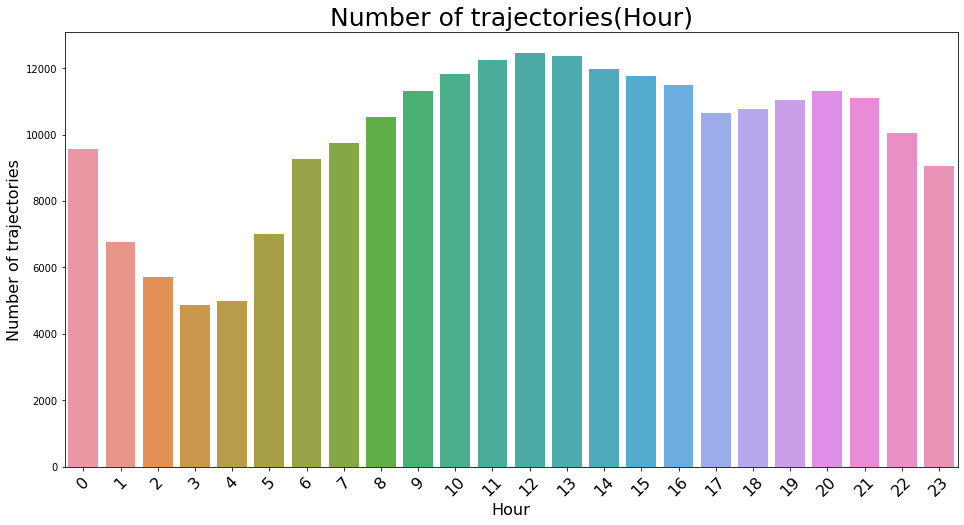

In [110]:
import seaborn as sns

plt.figure(figsize = (16,8))
sns.countplot(data = taxi_new, x = "hour_x")
plt.xlabel("Hour", fontsize = 16)
plt.ylabel("Number of trajectories", fontsize = 16)
plt.title("Number of trajectories(Hour)", fontsize = 25)
plt.xticks(rotation = 45, fontsize = 16)
plt.show()

**Least activity between 3:00 am to 4:00 am and most cabs were active during 12:00 pm to 01:00 pm**

###GeoSpatial Analysis

In [127]:
df = taxi_new[['lat_x','lon_x']]
# df['geometry_x'].apply(wkt.loads)
# gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon_x, df.lat_x))

In [129]:
gdf

,lat_x,lon_x,geometry
0,13.64769,100.78991,POINT (100.78991 13.64769)
1,13.64767,100.67939,POINT (100.67939 13.64767)
2,13.65371,100.67874,POINT (100.67874 13.65371)
3,13.68211,100.61034,POINT (100.61034 13.68211)
4,13.74752,100.57965,POINT (100.57965 13.74752)
...,...,...,...
239757,13.79392,100.71340,POINT (100.71340 13.79392)
239758,13.74967,100.64914,POINT (100.64914 13.74967)
239759,13.75243,100.63416,POINT (100.63416 13.75243)
239760,13.77795,100.65685,POINT (100.65685 13.77795)


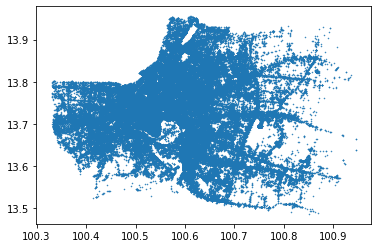

In [142]:
xs = [point.x for point in df.geometry]
ys = [point.y for point in df.geometry]
plt.scatter(xs, ys,s=0.25)

In [132]:
df1 = taxi_new[['lat_y','lon_y']]
# df['geometry_x'].apply(wkt.loads)
# gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf1 = gpd.GeoDataFrame(df1, geometry=gpd.points_from_xy(df1.lon_y, df1.lat_y))

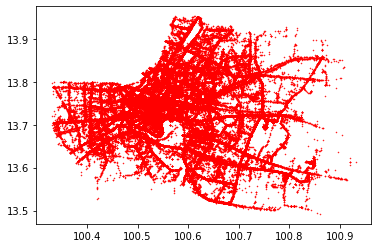

In [141]:
xs1 = [point.x for point in df1.geometry]
ys1 = [point.y for point in df1.geometry]
plt.scatter(xs1, ys1,color='r',s=0.25)

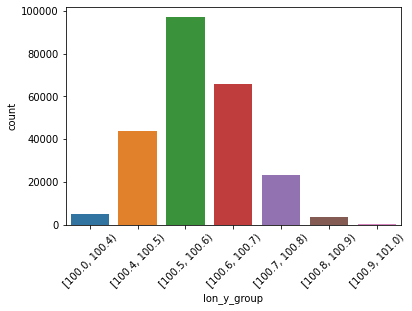

In [144]:
bins = [100,100.4,100.5,100.6,100.7,100.8,100.9,101]

df4_test = pd.DataFrame({'lon_y': df1['lon_y'], 
                        'lon_y_group': pd.cut(df1['lon_y'], bins=bins, right=False)})

ax4 = sns.countplot(data=df4_test, x='lon_y_group')
ax4.tick_params(axis='x', labelrotation=45)

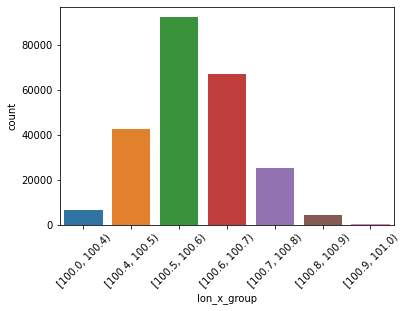

In [145]:
bins = [100,100.4,100.5,100.6,100.7,100.8,100.9,101]

df5_test = pd.DataFrame({'lon_x': df['lon_x'], 
                        'lon_x_group': pd.cut(df['lon_x'], bins=bins, right=False)})

ax5 = sns.countplot(data=df5_test, x='lon_x_group')
ax5.tick_params(axis='x', labelrotation=45)

**Taxis are more active between longitude 100.4 to 110.6**